In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [3]:
house_data = pd.read_csv("housing.csv")

In [4]:
house_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<AxesSubplot:>

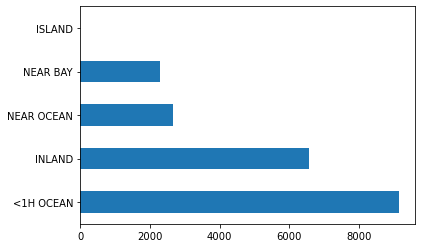

In [7]:
house_data["ocean_proximity"].value_counts().plot(kind="barh")

In [8]:
house_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


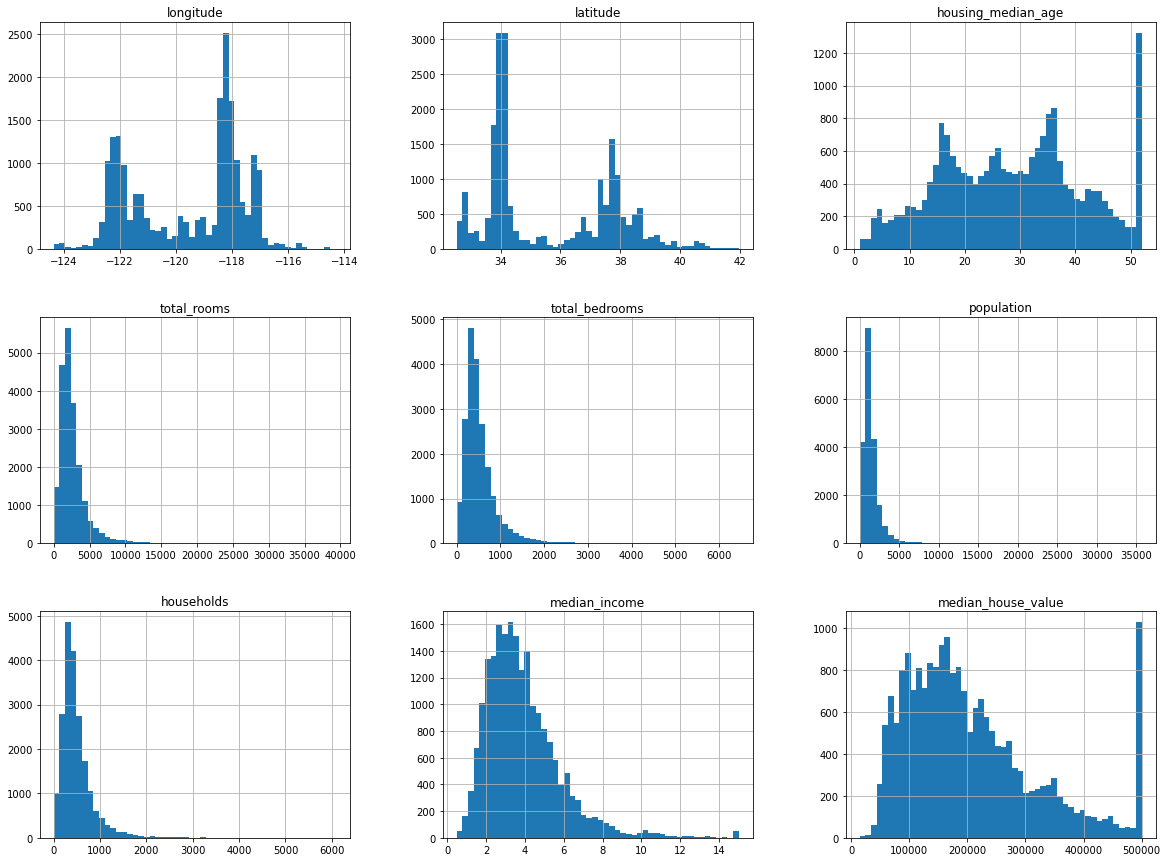

In [10]:
%matplotlib inline 
import matplotlib.pyplot as plt
house_data.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
house_data["income_cat"] = pd.cut(house_data["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

house_data["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

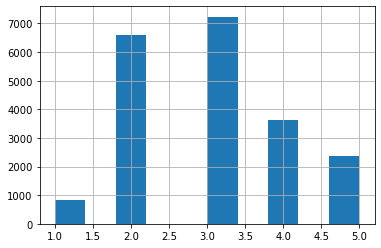

In [12]:
house_data["income_cat"].hist()

In [13]:
y = house_data["median_house_value"]
X = house_data.drop("median_house_value", axis=1)
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,2


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<AxesSubplot:>

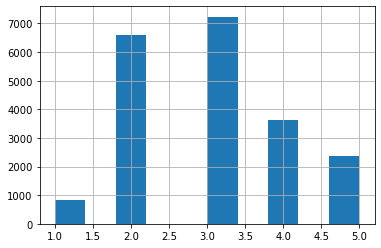

In [15]:
house_data["income_cat"].hist()

<AxesSubplot:>

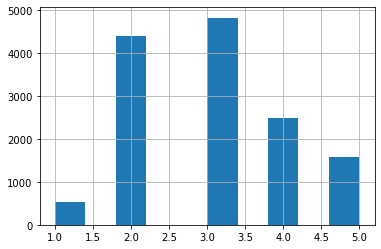

In [16]:
X_train["income_cat"].hist()

<AxesSubplot:>

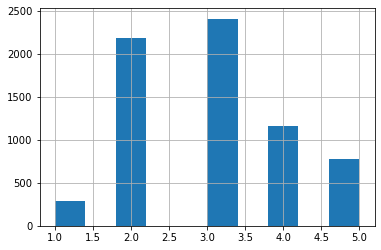

In [17]:
X_test["income_cat"].hist()

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(house_data, house_data["income_cat"]):
    strat_train_set = house_data.loc[train_index]
    strat_test_set = house_data.loc[test_index]

In [19]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [22]:
house_data["income_cat"].value_counts() / len(house_data)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [23]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(house_data, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(house_data),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


In [24]:
strat_train_set.drop("income_cat", axis="columns", inplace=True)
strat_test_set.drop("income_cat", axis="columns", inplace=True)

In [25]:
housing = strat_train_set.copy()

Visualize data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

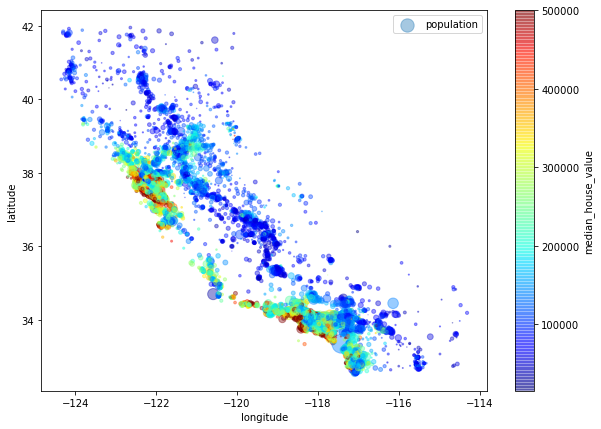

In [26]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)

In [27]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

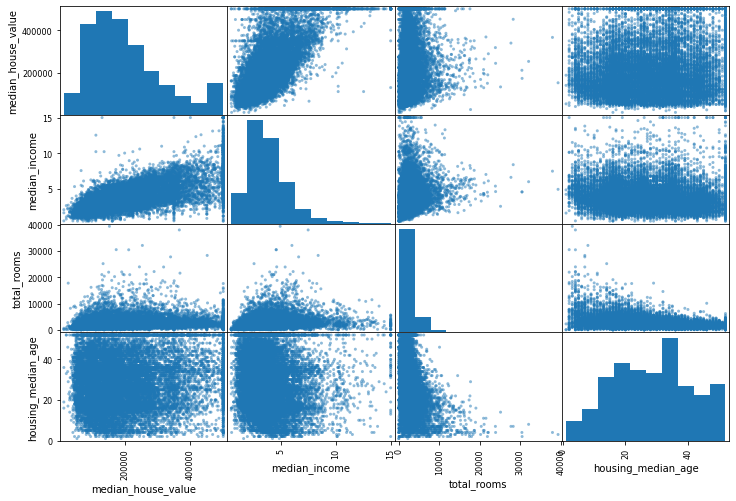

In [29]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))


<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

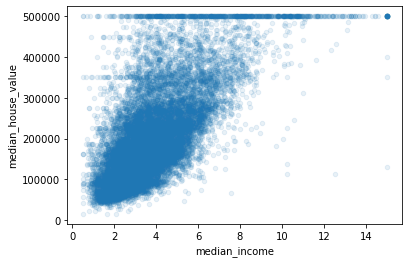

In [30]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.1)

In [31]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


<AxesSubplot:>

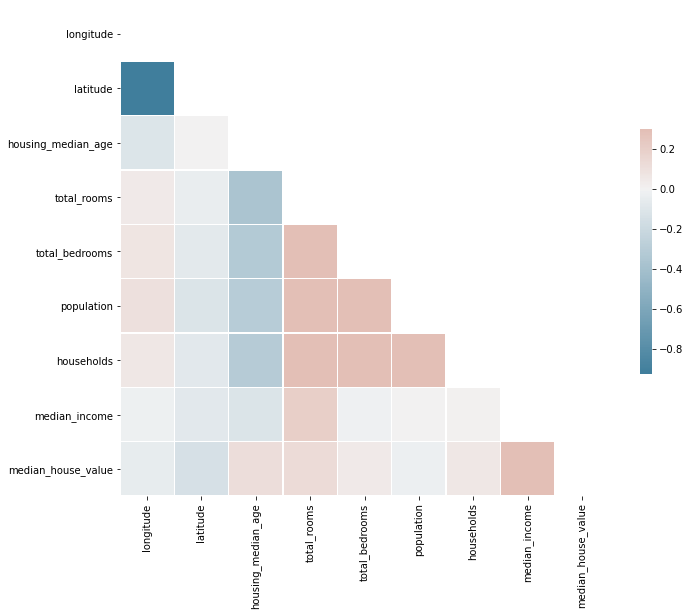

In [32]:
import seaborn as sns
import numpy as np

corr = housing.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Prepare for model

In [33]:
housing = strat_train_set.drop("median_house_value", axis=1)

housing_labels = strat_train_set["median_house_value"].copy()

In [34]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [35]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"]) 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [36]:
sample_incomplete_rows.drop("total_bedrooms", axis=1) 

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


In [38]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # imputing

In [39]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,<1H OCEAN


In [40]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [41]:
housing_num = housing.select_dtypes(include=[np.number])

In [42]:
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [43]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [44]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [45]:
X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662


In [46]:
imputer.strategy

'median'

In [47]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [48]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [49]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [50]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [51]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [52]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [53]:
def feature_engineering(data):
    data["bedrooms_per_household"] = data["total_bedrooms"] / data["households"]
    data["population_per_household"] = data["population"] / data["households"]
    data["rooms_per_household"] = data["total_rooms"] / data["households"]

    return data

In [54]:
housing_feature_engineered = feature_engineering(housing_num)
housing_feature_engineered

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_household,population_per_household,rooms_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,1.035398,2.094395,4.625369
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,0.955752,2.707965,6.008850
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,1.019481,2.025974,4.225108
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,1.050992,4.135977,5.232295
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,1.042379,3.047847,4.505810
...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,1.123810,2.728571,6.052381
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,1.139535,4.077519,4.635659
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,1.139869,2.742484,6.346405
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,1.067416,3.808989,5.505618


Scaling 

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

housing_scaled = scaler.fit_transform(housing_feature_engineered)
housing_scaled

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.12461343,
        -0.08649871, -0.31205452],
       [-1.17602483,  0.6596948 , -1.1653172 , ..., -0.28097679,
        -0.03353391,  0.21768338],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.15586354,
        -0.09240499, -0.46531516],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.08048715,
        -0.03055414,  0.3469342 ],
       [ 0.78221312, -0.85106801,  0.18664186, ..., -0.06175575,
         0.06150916,  0.02499488],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.0619974 ,
        -0.09586294, -0.22852947]])

In [56]:
ml_input_data = np.hstack([housing_cat_1hot, housing_scaled])

In [57]:
housing_feature_engineered

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,bedrooms_per_household,population_per_household,rooms_per_household
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,1.035398,2.094395,4.625369
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,0.955752,2.707965,6.008850
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,1.019481,2.025974,4.225108
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,1.050992,4.135977,5.232295
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,1.042379,3.047847,4.505810
...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,1.123810,2.728571,6.052381
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,1.139535,4.077519,4.635659
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,1.139869,2.742484,6.346405
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,1.067416,3.808989,5.505618


In [58]:
housing = strat_train_set.drop("median_house_value", axis=1)

housing_labels = strat_train_set["median_house_value"].copy()

def data_transformations(data):

    ### Separate Labels if they Exist ###

    if "median_house_value" in data.columns:
        labels = data["median_house_value"]
        data = data.drop("median_house_value", axis=1)
        
    else:
        labels = None

    ### Feature Engineering ###
    feature_engineered_data = feature_engineering(data)
    features = list(feature_engineered_data.columns) # Creating a list of our features for future use

    ### Imputing Data ###
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy="median")

    housing_num = feature_engineered_data.select_dtypes(include=[np.number])
    imputed = imputer.fit_transform(housing_num)

    ### Encoding Categorical Data ###
    housing_cat = feature_engineered_data.select_dtypes(exclude=[np.number])

    from sklearn.preprocessing import OneHotEncoder
    cat_encoder = OneHotEncoder(sparse=False)
    housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
    features = features + cat_encoder.categories_[0].tolist()
    features.remove("ocean_proximity") # We're encoding this variable, so we don't need it in our list anymore


    ### Scaling Numerical Data ###
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()

    housing_scaled = scaler.fit_transform(imputed)

    ### Concatening all Data ###
    output = np.hstack([housing_scaled, housing_cat_1hot])

    return output, labels, features

In [59]:
cat_encoder.categories_[0].tolist()

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [60]:
train_data, train_labels, features= data_transformations(strat_train_set)
train_data

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [61]:
train_labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

In [62]:
test_data, test_labels, features = data_transformations(strat_test_set)
test_data

array([[ 0.57471497, -0.69620912,  0.03285951, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.83839441, -0.86074221,  0.82471029, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.24635944, -0.65390061, -0.12551065, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.52496413, -0.66800344,  0.19122966, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.10704893, -0.75732141, -0.12551065, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.31601062,  0.55894333, -0.75899128, ...,  0.        ,
         0.        ,  0.        ]])

In [63]:
test_labels

5241     500001.0
10970    240300.0
20351    218200.0
6568     182100.0
13285    121300.0
           ...   
20519     76400.0
17430    134000.0
4019     311700.0
12107    133500.0
2398      78600.0
Name: median_house_value, Length: 4128, dtype: float64

In [65]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_data, train_labels)

LinearRegression()

In [66]:
# Compare against some Test Data

original_values = test_labels[:5]

predicted_values = lin_reg.predict(test_data[:5])

comparison_dataframe = pd.DataFrame(data={"Original Values":original_values, "Predicted Values":predicted_values})

comparison_dataframe["Differences"] = comparison_dataframe["Original Values"] - comparison_dataframe["Predicted Values"]

comparison_dataframe

,Original Values,Predicted Values,Differences
5241,500001.0,421413.363329,78587.636671
10970,240300.0,260227.976280,-19927.976280
20351,218200.0,226814.811944,-8614.811944
6568,182100.0,202785.858376,-20685.858376
13285,121300.0,165947.558618,-44647.558618


In [67]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(original_values, predicted_values)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

42587.94451069396

In [68]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(original_values, predicted_values)
lin_mae

34492.76837769456

In [69]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_data, train_labels)

DecisionTreeRegressor(random_state=42)

In [70]:
train_predictions = tree_reg.predict(train_data)
tree_mse = mean_squared_error(train_labels, train_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [71]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train_data, train_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [72]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [71651.73681115 68908.88378904 69837.95849446 74273.12571063
 70569.16041628 74723.14094394 70439.52867477 69259.50811177
 78240.7656732  69561.76956763]
Mean: 71746.55781928787
Standard deviation: 2884.0209802819504


In [73]:
lin_scores = cross_val_score(lin_reg, train_data, train_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [67083.26115433 67267.972113   68017.03729959 74628.43506652
 69405.03602009 71470.01540904 65040.03927457 68556.11444074
 72455.11331778 67887.75188515]
Mean: 69181.07759808158
Standard deviation: 2725.9800430252913


In [74]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(train_data, train_labels)

RandomForestRegressor(random_state=42)

In [75]:
train_predictions = forest_reg.predict(train_data)
forest_mse = mean_squared_error(train_labels, train_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18678.183211366006

In [76]:

from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, train_data, train_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49754.35067065 47346.47090242 50117.76189514 52857.98783162
 49610.47368883 53551.91042057 49107.02232839 47840.95359996
 53363.70234564 50520.06375328]
Mean: 50407.06974365081
Standard deviation: 2084.1812169852983


In [77]:
scores = cross_val_score(lin_reg, train_data, train_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69181.077598
std       2873.435264
min      65040.039275
25%      67422.917056
50%      68286.575870
75%      70953.770562
max      74628.435067
dtype: float64

In [78]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(train_data, train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [79]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [80]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [81]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64796.29671399816 {'max_features': 2, 'n_estimators': 3}
55775.16268850132 {'max_features': 2, 'n_estimators': 10}
53249.85197335964 {'max_features': 2, 'n_estimators': 30}
61138.14355385365 {'max_features': 4, 'n_estimators': 3}
52863.07424277029 {'max_features': 4, 'n_estimators': 10}
50407.76890205031 {'max_features': 4, 'n_estimators': 30}
58164.54455183473 {'max_features': 6, 'n_estimators': 3}
52152.13119714364 {'max_features': 6, 'n_estimators': 10}
49930.745353171194 {'max_features': 6, 'n_estimators': 30}
58193.17858193583 {'max_features': 8, 'n_estimators': 3}
52149.918210044154 {'max_features': 8, 'n_estimators': 10}
49547.47082113679 {'max_features': 8, 'n_estimators': 30}
63033.39486799303 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54575.277358618645 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58515.25644925327 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52081.57821584743 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [82]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.065073,0.001123,0.004014,0.000206,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.033145e+09,-4.216802e+09,...,-4.198560e+09,9.656402e+07,18,-1.156359e+09,-1.086126e+09,-1.179434e+09,-1.232901e+09,-1.122620e+09,-1.155488e+09,4.991685e+07
1,0.217491,0.001462,0.011720,0.000311,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.850059e+09,-3.263461e+09,...,-3.110869e+09,1.534865e+08,11,-5.897121e+08,-5.684097e+08,-5.849390e+08,-5.899852e+08,-5.746099e+08,-5.815312e+08,8.603367e+06
2,0.650502,0.004163,0.034625,0.000489,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.600753e+09,-2.982751e+09,...,-2.835547e+09,1.754162e+08,9,-4.469698e+08,-4.340389e+08,-4.381881e+08,-4.418626e+08,-4.265185e+08,-4.375156e+08,6.953489e+06
3,0.107492,0.001765,0.004256,0.000096,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.415646e+09,-3.800466e+09,...,-3.737873e+09,1.708007e+08,16,-9.841236e+08,-9.532705e+08,-1.042962e+09,-1.060888e+09,-9.435309e+08,-9.969549e+08,4.718291e+07
4,0.348999,0.001527,0.011973,0.000184,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.659842e+09,-2.874472e+09,...,-2.794505e+09,8.887037e+07,8,-5.230004e+08,-5.096829e+08,-5.065158e+08,-5.372295e+08,-5.064914e+08,-5.165840e+08,1.198549e+07
5,1.039653,0.004574,0.034244,0.000277,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.381173e+09,-2.618105e+09,...,-2.540943e+09,1.257149e+08,3,-3.887976e+08,-3.832867e+08,-3.850775e+08,-4.035270e+08,-3.821878e+08,-3.885753e+08,7.805208e+06
6,0.142518,0.001511,0.003951,0.000114,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.062387e+09,-3.441023e+09,...,-3.383114e+09,1.705490e+08,12,-8.649995e+08,-8.643093e+08,-9.099060e+08,-9.282465e+08,-9.060524e+08,-8.947027e+08,2.565613e+07
7,0.479238,0.002553,0.011893,0.000134,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.547701e+09,-2.759930e+09,...,-2.719845e+09,1.324912e+08,7,-4.945902e+08,-4.916454e+08,-4.935797e+08,-5.032370e+08,-5.059995e+08,-4.978103e+08,5.705876e+06
8,1.441900,0.003606,0.034375,0.000377,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.334794e+09,-2.551722e+09,...,-2.493079e+09,1.502788e+08,2,-3.789610e+08,-3.742746e+08,-3.790410e+08,-3.801853e+08,-3.789293e+08,-3.782783e+08,2.056092e+06
9,0.184229,0.001862,0.003913,0.000143,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.349788e+09,-3.698870e+09,...,-3.386446e+09,1.888014e+08,13,-9.185787e+08,-8.937910e+08,-8.289324e+08,-9.110356e+08,-9.119743e+08,-8.928624e+08,3.299928e+07


In [83]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(train_data, train_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbf100e93c8>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbf100e9a58>},
                   random_state=42, scoring='neg_mean_squared_error')

In [84]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

48872.96730239911 {'max_features': 7, 'n_estimators': 180}
51407.61346702038 {'max_features': 5, 'n_estimators': 15}
50440.74137729941 {'max_features': 3, 'n_estimators': 72}
50715.017643468156 {'max_features': 5, 'n_estimators': 21}
48979.26226521618 {'max_features': 7, 'n_estimators': 122}
50429.11256883642 {'max_features': 3, 'n_estimators': 75}
50278.24289394691 {'max_features': 3, 'n_estimators': 88}
49215.51860219781 {'max_features': 5, 'n_estimators': 100}
50163.34567766393 {'max_features': 3, 'n_estimators': 150}
65146.55285210115 {'max_features': 5, 'n_estimators': 2}


In [85]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.27645191e-02, 6.42396403e-02, 4.31625073e-02, 1.59415065e-02,
       1.43511492e-02, 1.53067941e-02, 1.45315454e-02, 3.77190926e-01,
       2.31534220e-02, 1.06333683e-01, 7.28545386e-02, 8.86746054e-03,
       1.67043593e-01, 1.01091754e-04, 1.54638032e-03, 2.61124239e-03])

In [86]:
feature_importance_list = list(zip(features, feature_importances.tolist()))
feature_importance_list

[('longitude', 0.07276451905687747),
 ('latitude', 0.06423964030907002),
 ('housing_median_age', 0.04316250728302085),
 ('total_rooms', 0.0159415064754067),
 ('total_bedrooms', 0.014351149206325242),
 ('population', 0.015306794129914468),
 ('households', 0.014531545444431403),
 ('median_income', 0.37719092616977545),
 ('bedrooms_per_household', 0.023153421979392314),
 ('population_per_household', 0.10633368337710118),
 ('rooms_per_household', 0.07285453862321799),
 ('<1H OCEAN', 0.008867460535337829),
 ('INLAND', 0.16704359295081123),
 ('ISLAND', 0.00010109175397702533),
 ('NEAR BAY', 0.0015463803195537658),
 ('NEAR OCEAN', 0.002611242385787115)]

<BarContainer object of 16 artists>

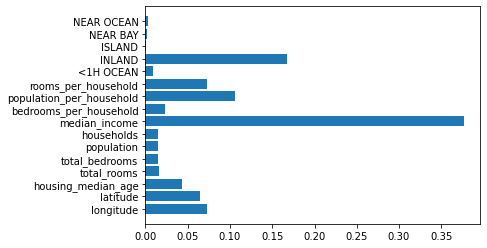

In [87]:
plt.barh(y=features, width=feature_importances.tolist())

In [88]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(test_data)

final_mse = mean_squared_error(test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)

In [89]:
final_rmse

66242.47977049224